<a href="https://colab.research.google.com/github/plaban1981/Fastai/blob/master/Bird_call_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6
!kaggle -v

Found existing installation: kaggle 1.5.6
Uninstalling kaggle-1.5.6:
  Successfully uninstalled kaggle-1.5.6
Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (20.2.1)
Processing /root/.cache/pip/wheels/01/3e/ff/77407ebac3ef71a79b9166a8382aecf88415a0bcbe3c095a01/kaggle-1.5.6-py3-none-any.whl
Kaggle API 1.5.6


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"plabannayak","key":"2d11875e19271d86bf87fe71199d244f"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


# Download Competition Data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!kaggle competitions download -c  birdsong-recognition  -p '/content/Birdcall'

100% 22.1G/22.1G [09:22<00:00, 30.5MB/s]
100% 22.1G/22.1G [09:22<00:00, 42.2MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import shutil
!unzip /content/Birdcall/birdsong-recognition.zip -d '/content/drive/My Drive/Birdcall'

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/My Drive/Birdcall/train_audio/ribgul/XC504340.mp3  
  inflating: /content/drive/My Drive/Birdcall/train_audio/ribgul/XC54371.mp3  
  inflating: /content/drive/My Drive/Birdcall/train_audio/ribgul/XC70951.mp3  
  inflating: /content/drive/My Drive/Birdcall/train_audio/ribgul/XC71563.mp3  
  inflating: /content/drive/My Drive/Birdcall/train_audio/ribgul/XC71564.mp3  
  inflating: /content/drive/My Drive/Birdcall/train_audio/ribgul/XC71565.mp3  
  inflating: /content/drive/My Drive/Birdcall/train_audio/ribgul/XC71566.mp3  
  inflating: /content/drive/My Drive/Birdcall/train_audio/ribgul/XC71567.mp3  
  inflating: /content/drive/My Drive/Birdcall/train_audio/ribgul/XC75111.mp3  
  inflating: /content/drive/My Drive/Birdcall/train_audio/rinduc/XC139900.mp3  
  inflating: /content/drive/My Drive/Birdcall/train_audio/rinduc/XC143031.mp3  
  inflating: /content/drive/My Drive/Birdcall/train_audio/rinduc/XC152763.mp3

In [5]:
import os
os.listdir('/content/drive/My Drive/Birdcall')

['example_test_audio_summary.csv',
 'example_test_audio_metadata.csv',
 'test.csv',
 'sample_submission.csv',
 'train.csv',
 'example_test_audio',
 'train_audio',
 'spectogram']

In [54]:
os.listdir('/content/drive/My Drive/Birdcall/example_test_audio')

['BLKFR-10-CPL_20190611_093000.pt540.mp3',
 'ORANGE-7-CAP_20190606_093000.pt623.mp3']

# Import Libraries

In [1]:
import pandas as pd
import os
import librosa
import librosa.display
from fastai import *
from fastai.vision import *

In [6]:
train = pd.read_csv('/content/drive/My Drive/Birdcall/train.csv')
test = pd.read_csv('/content/drive/My Drive/Birdcall/test.csv')
sub = pd.read_csv('/content/drive/My Drive/Birdcall/sample_submission.csv')

In [7]:
train.head()

,rating,playback_used,ebird_code,channels,date,pitch,duration,filename,speed,species,number_of_notes,title,secondary_labels,bird_seen,sci_name,location,latitude,sampling_rate,type,elevation,description,bitrate_of_mp3,file_type,volume,background,xc_id,url,country,author,primary_label,longitude,length,time,recordist,license
0,3.5,no,aldfly,1 (mono),2013-05-25,Not specified,25,XC134874.mp3,Not specified,Alder Flycatcher,Not specified,XC134874 Alder Flycatcher (Empidonax alnorum),"['Empidonax minimus_Least Flycatcher', 'Leioth...",yes,Empidonax alnorum,"Grey Cloud Dunes SNA, Washington, Minnesota",44.793,48000 (Hz),call,220 m,Two short segments of fairly quiet *pip* calls...,192000 (bps),mp3,Not specified,American Yellow Warbler (Setophaga aestiva); L...,134874,https://www.xeno-canto.org/134874,United States,Jonathon Jongsma,Empidonax alnorum_Alder Flycatcher,-92.962,Not specified,8:00,Jonathon Jongsma,Creative Commons Attribution-ShareAlike 3.0
1,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135454.mp3,both,Alder Flycatcher,1-3,XC135454 Alder Flycatcher (Empidonax alnorum),[],yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100 (Hz),"call, song",1700 m,At least three birds seen here moving around s...,128000 (bps),mp3,level,NaN,135454,https://www.xeno-canto.org/135454,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
2,4.0,no,aldfly,2 (stereo),2013-05-27,both,39,XC135455.mp3,both,Alder Flycatcher,1-3,XC135455 Alder Flycatcher (Empidonax alnorum),[],yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100 (Hz),"call, song",1700 m,At least three birds seen chasing each other a...,128000 (bps),mp3,level,NaN,135455,https://www.xeno-canto.org/135455,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
3,3.5,no,aldfly,2 (stereo),2013-05-27,both,33,XC135456.mp3,both,Alder Flycatcher,1-3,XC135456 Alder Flycatcher (Empidonax alnorum),"['Dumetella carolinensis_Gray Catbird', 'Bomby...",yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100 (Hz),"call, song",1700 m,img:http://www.flickr.com/photos/madbirder/888...,128000 (bps),mp3,level,Grey Catbird (Dumetella carolinensis); Cedar W...,135456,https://www.xeno-canto.org/135456,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
4,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135457.mp3,level,Alder Flycatcher,1-3,XC135457 Alder Flycatcher (Empidonax alnorum),[],yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100 (Hz),"call, song",1700 m,img:http://www.flickr.com/photos/madbirder/888...,128000 (bps),mp3,level,NaN,135457,https://www.xeno-canto.org/135457,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...


In [ ]:
train['species'].nunique()

264

(array([  0,   1,   2,   3, ..., 260, 261, 262, 263]),
 <a list of 264 Text major ticklabel objects>)

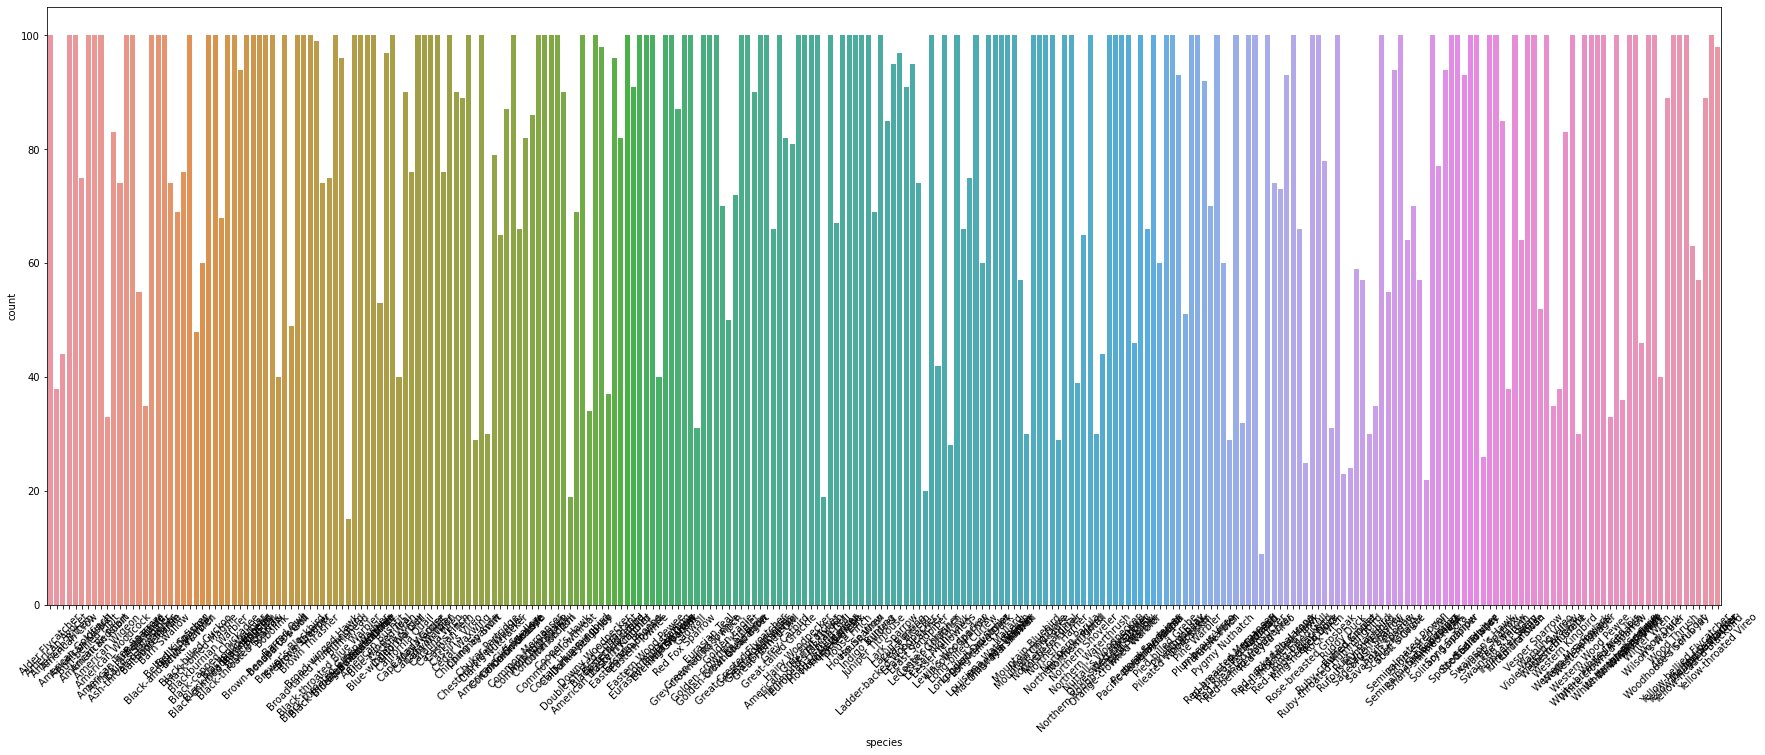

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30,11))
sns.countplot(train['species'])
plt.xticks(rotation =45)

In [ ]:
import IPython
IPython.display.Audio('/content/drive/My Drive/Birdcall/train_audio/aldfly/XC134874.mp3')

# Visualize the audio using waveplot

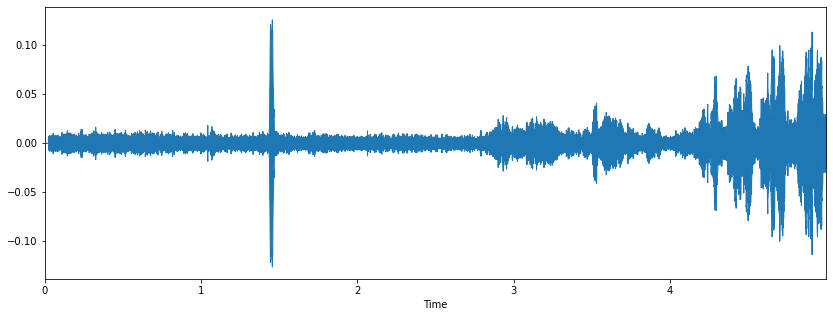

In [ ]:
plt.figure(figsize=(14, 5))
x,sr=librosa.load('/content/drive/My Drive/Birdcall/train_audio/aldfly/XC134874.mp3',duration=5.0)
librosa.display.waveplot(x, sr=sr)

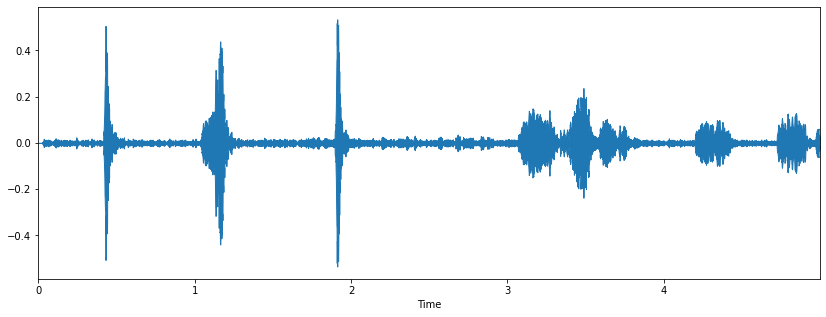

In [ ]:
plt.figure(figsize=(14, 5))
x,sr=librosa.load('/content/drive/My Drive/Birdcall/train_audio/aldfly/XC135456.mp3',duration=5.0)
librosa.display.waveplot(x, sr=sr)

In [8]:
train_sound = train[['ebird_code','filename','species']].copy()

In [9]:
train_sound.head()

,ebird_code,filename,species
0,aldfly,XC134874.mp3,Alder Flycatcher
1,aldfly,XC135454.mp3,Alder Flycatcher
2,aldfly,XC135455.mp3,Alder Flycatcher
3,aldfly,XC135456.mp3,Alder Flycatcher
4,aldfly,XC135457.mp3,Alder Flycatcher


In [10]:

train_sound['Image'] = train_sound['filename'].apply(lambda x : x.replace(".mp3",".png"))

In [11]:
train_sound.shape

(21375, 4)

In [12]:
train_sound.head()

,ebird_code,filename,species,Image
0,aldfly,XC134874.mp3,Alder Flycatcher,XC134874.png
1,aldfly,XC135454.mp3,Alder Flycatcher,XC135454.png
2,aldfly,XC135455.mp3,Alder Flycatcher,XC135455.png
3,aldfly,XC135456.mp3,Alder Flycatcher,XC135456.png
4,aldfly,XC135457.mp3,Alder Flycatcher,XC135457.png


In [14]:
image_list = [ img for img in os.listdir('/content/drive/My Drive/Birdcall/spectogram')]

In [15]:
len(image_list)

21375

In [16]:
image_list[0]

'XC194086.png'

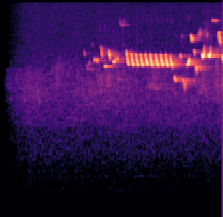

In [20]:
import PIL
PIL.Image.open('/content/drive/My Drive/Birdcall/spectogram/XC194086.png')

## Convert .mp3 files to .png

In [ ]:
l = []
for img in train_sound['filename'].values.tolist():
  name = img.replace('.mp3','.png')
  if name not in image_list:
    l.append(name)

In [ ]:
len(l)

1

In [ ]:
if 'XC235065.png' not in image_list:
  print(False)

In [ ]:
src ='/content/drive/My Drive/Birdcall/train_audio/'
dest = '/content/drive/My Drive/Birdcall/spectogram/'
for image in train_sound.values.tolist():
  name = image[1].replace('.mp3','.png')
  if name not in image_list:
    audio_file = src+image[0]+"/"+image[1]
    #print(audio_file)
    try:
      samples,sample_rate = librosa.load(audio_file,duration=5.0)
    except ZeroDivisionError  as e:
      continue

    fig = plt.figure(figsize=[0.72,0.72])
    ax =fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    filename = dest+ image[1].replace('.mp3','.png')
    S = librosa.feature.melspectrogram(y=samples,sr=sample_rate)
    librosa.display.specshow(librosa.power_to_db(S,ref=np.max))

    plt.savefig(filename,dpi=400,bbox_inches="tight",pad_inches=0)
    plt.close('all')

In [22]:
train_df = train_sound[['Image','species']].copy()

In [23]:
train_df = train_df[train_df['Image'].isin(image_list)]

In [24]:
train_df.shape

(21374, 2)

In [25]:
train_df.head()

,Image,species
0,XC134874.png,Alder Flycatcher
1,XC135454.png,Alder Flycatcher
2,XC135455.png,Alder Flycatcher
3,XC135456.png,Alder Flycatcher
4,XC135457.png,Alder Flycatcher


In [ ]:
exm_audio_sum = pd.read_csv('/content/drive/My Drive/Birdcall/example_test_audio_summary.csv')
exm_audio_meta = pd.read_csv('/content/drive/My Drive/Birdcall/example_test_audio_metadata.csv')

In [ ]:
test.head()

,site,row_id,seconds,audio_id
0,site_1,site_1_0a997dff022e3ad9744d4e7bbf923288_5,5,0a997dff022e3ad9744d4e7bbf923288
1,site_1,site_1_0a997dff022e3ad9744d4e7bbf923288_10,10,0a997dff022e3ad9744d4e7bbf923288
2,site_1,site_1_0a997dff022e3ad9744d4e7bbf923288_15,15,0a997dff022e3ad9744d4e7bbf923288


In [ ]:
exm_audio_meta.head()

,file_id,device,date,hour,source,ebird_code,certainty,vox_type,time_start,time_end,channel
0,BLKFR-10-CPL_20190611_093000,BLKFR-10-CPL,20190611,93000,jack,westan,c,call,0.255394,0.858845,2
1,ORANGE-7-CAP_20190606_093000,ORANGE-7-CAP,20190606,93000,jack,squirrel,c,call,0.415966,1.410334,1
2,BLKFR-10-CPL_20190611_093000,BLKFR-10-CPL,20190611,93000,jack,gockin,l,call,0.590725,1.944412,2
3,BLKFR-10-CPL_20190611_093000,BLKFR-10-CPL,20190611,93000,jack,mouchi,c,call,1.609081,2.130985,2
4,ORANGE-7-CAP_20190606_093000,ORANGE-7-CAP,20190606,93000,jack,brncre,c,song,2.461655,2.746925,1


In [ ]:
exm_audio_sum .head()

,filename_seconds,birds,filename,seconds
0,BLKFR-10-CPL_20190611_093000_5,gockin mouchi westan,BLKFR-10-CPL,5
1,BLKFR-10-CPL_20190611_093000_10,gockin westan,BLKFR-10-CPL,10
2,BLKFR-10-CPL_20190611_093000_15,gockin westan,BLKFR-10-CPL,15
3,BLKFR-10-CPL_20190611_093000_20,mouchi,BLKFR-10-CPL,20
4,BLKFR-10-CPL_20190611_093000_25,mouchi,BLKFR-10-CPL,25


In [27]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
path = '/content/drive/My Drive/Birdcall/spectogram'
data = ImageDataBunch.from_df(path=path, df=train_df,
                              fn_col=0, 
                              label_col=1,
                              ds_tfms=get_transforms(),
                              valid_pct=0.2,bs=16,size=72).normalize(imagenet_stats)

In [37]:
data.c

264

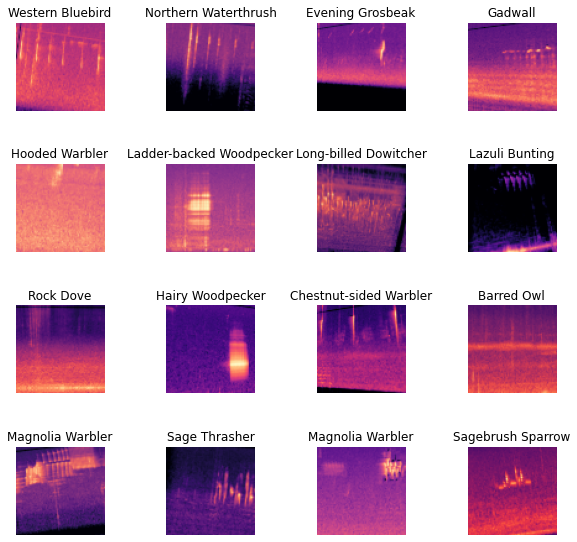

In [38]:
data.show_batch(rows=6,figsize=(8,8))

In [39]:
data

ImageDataBunch;

Train: LabelList (17100 items)
x: ImageList
Image (3, 72, 72),Image (3, 72, 72),Image (3, 72, 72),Image (3, 72, 72),Image (3, 72, 72)
y: CategoryList
Alder Flycatcher,Alder Flycatcher,Alder Flycatcher,Alder Flycatcher,Alder Flycatcher
Path: /content/drive/My Drive/Birdcall/spectogram;

Valid: LabelList (4274 items)
x: ImageList
Image (3, 72, 72),Image (3, 72, 72),Image (3, 72, 72),Image (3, 72, 72),Image (3, 72, 72)
y: CategoryList
Common Yellowthroat,Canada Warbler,Scott's Oriole,Great Blue Heron,White-throated Sparrow
Path: /content/drive/My Drive/Birdcall/spectogram;

Test: None

## Create Model

In [40]:
learn = cnn_learner(data,models.densenet169,metrics=[accuracy],model_dir='/content/tmp')

In [41]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,5.627178,4.979392,0.068320,03:17
1,4.595847,4.080420,0.153954,03:23
2,4.052524,3.567819,0.245671,03:19
3,3.681900,3.273334,0.295508,03:18
4,3.253789,3.201828,0.310248,03:18


## Find the appropriate Learning Rate for the model

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


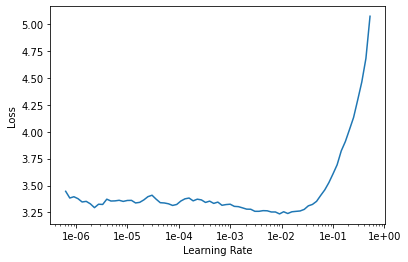

In [42]:
learn.lr_find()
learn.recorder.plot()

In [43]:
learn.fit_one_cycle(10,wd=1e-4)

epoch,train_loss,valid_loss,accuracy,time
0,3.307236,3.170332,0.319607,03:17
1,3.585222,3.197525,0.311652,03:17
2,3.508755,3.165995,0.306972,03:16
3,3.325741,2.997073,0.345578,03:17
4,3.294861,2.856359,0.371315,03:15
5,2.851743,2.778191,0.391437,03:17
6,2.763661,2.678327,0.415068,03:16
7,2.749815,2.623768,0.424427,03:16
8,2.541357,2.590476,0.431446,03:17
9,2.405482,2.597249,0.434722,03:18


In [44]:
learn.fit_one_cycle(15,max_lr=(1e-4, 1e-3, 1e-2), wd=(1e-4, 1e-4, 1e-1))

epoch,train_loss,valid_loss,accuracy,time
0,2.604876,2.632752,0.423023,03:21
1,3.128783,2.930056,0.356809,03:18
2,3.705575,3.305886,0.278428,03:17
3,4.006457,3.631932,0.228591,03:17
4,3.897579,3.755686,0.224848,03:18
5,3.996016,4.276225,0.219233,03:16
6,3.816553,3.563752,0.251989,03:16
7,3.748184,3.544214,0.259710,03:14
8,3.648174,3.605804,0.288489,03:15
9,3.498742,3.271365,0.325222,03:14


In [45]:
learn.unfreeze()


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


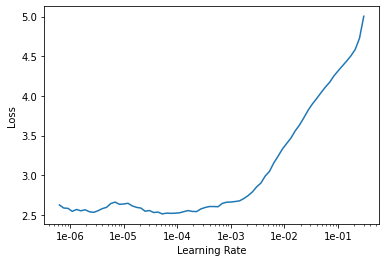

In [46]:
learn.lr_find()
learn.recorder.plot()

In [47]:
learn.fit_one_cycle(25,max_lr=(1e-5, 1e-4, 1e-3), wd=(1e-4, 1e-4, 1e-1))

epoch,train_loss,valid_loss,accuracy,time
0,2.500212,2.561038,0.445484,03:52
1,2.571516,2.577966,0.443379,03:51
2,2.577994,2.501405,0.447824,03:50
3,2.604330,2.484197,0.443847,03:48
4,2.583959,2.491863,0.450632,03:47
5,2.719981,2.502997,0.444548,03:49
6,2.532039,2.502018,0.445952,03:48
7,2.533221,2.428112,0.464202,03:49
8,2.286865,2.362760,0.470753,03:50
9,2.273397,2.340480,0.474965,03:51


Buffered data was truncated after reaching the output size limit.

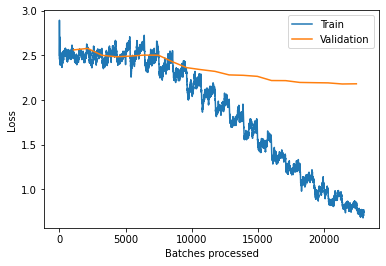

In [48]:
learn.recorder.plot_losses()

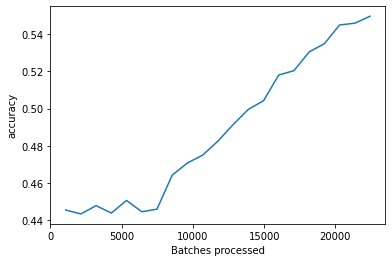

In [50]:
learn.recorder.plot_metrics()

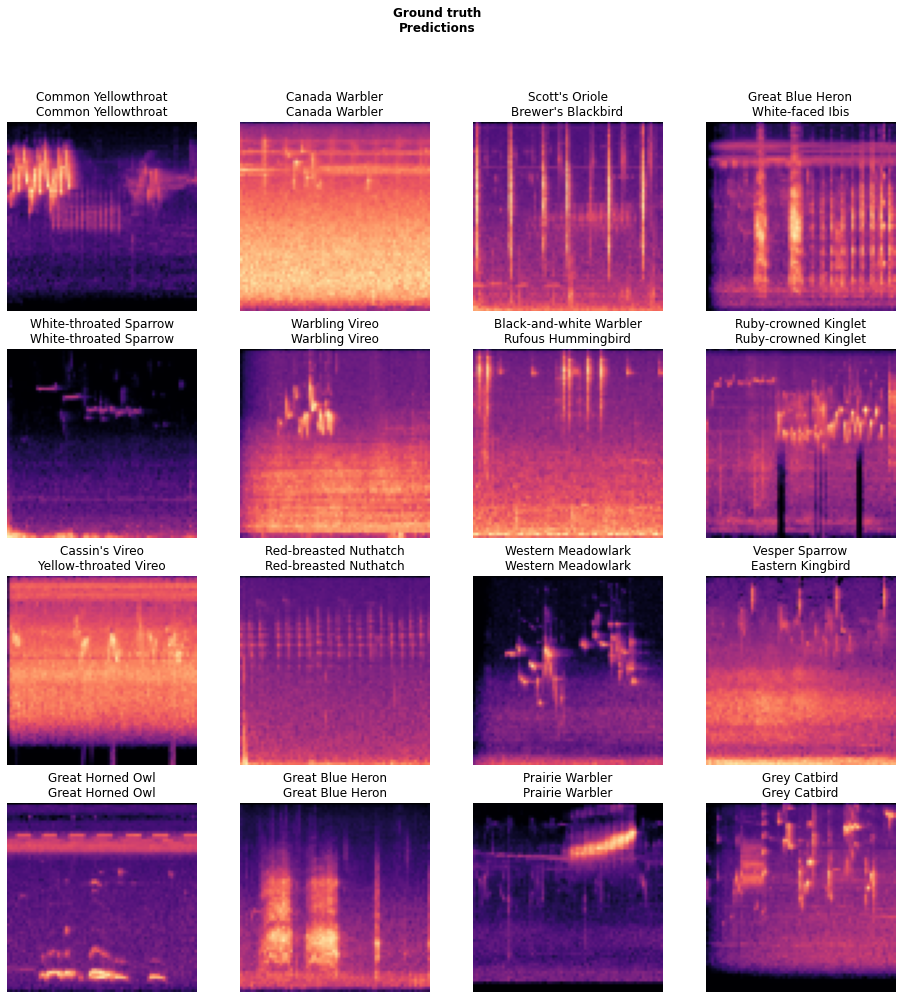

In [51]:
learn.show_results()

In [52]:
test.head()

,site,row_id,seconds,audio_id
0,site_1,site_1_0a997dff022e3ad9744d4e7bbf923288_5,5,0a997dff022e3ad9744d4e7bbf923288
1,site_1,site_1_0a997dff022e3ad9744d4e7bbf923288_10,10,0a997dff022e3ad9744d4e7bbf923288
2,site_1,site_1_0a997dff022e3ad9744d4e7bbf923288_15,15,0a997dff022e3ad9744d4e7bbf923288


## Validation Accuracy

In [55]:
preds,y = learn.get_preds(DatasetType.Valid)

# Validation Accuracy

In [56]:
accuracy(preds,y)

tensor(0.5512)

## Further Readings

https://www.kaggle.com/anjum48/pytorch-lightning
http://www.kaggle.com/rohanrao/xeno-canto-bird-recordings-extended-n-z
http://www.kaggle.com/rohanrao/xeno-canto-bird-recordings-extended-a-m
https://github.com/qiuqiangkong/audioset_tagging_cnn
https://pytorch.org/docs/stable/torchvision/models.html